In [52]:
# script for making new forecasts


this script will have to do the following:
-  import latest observations of independent variables
    - I can access these from the backtest object variable 'X'
    - will have to identify an way to search through the databases to import each variable
- pass the latest observation to the model using .predict() 
- record this forecast by appending it to the backtest results object
- update performance stats
    - add date suffix to file
    - perhaps a sub-folder for storage?
- chart that delineates between backtest and live results
- 

In [53]:
# import backtest object
import pickle

class backtest_object:
  def __init__(self,grid_search, X, y, best_estim_preds, final_model):
    self.grid_search = grid_search
    self.X = X
    self.y = y
    self.best_estim_preds = best_estim_preds
    self.final_model = best_gbm

def Acc_Score(y_true,y_pred):
    global ys
    ys.append(y_pred)
    acc = accuracy_score(y_true, y_pred)    
    return acc

# Load the object from the file
with open('backtest_object_10Y_UST_v1_1.pkl', 'rb') as file:
    backtest_object_10Y_UST_v1_1 = pickle.load(file)

In [54]:
# Load the object from the file
with open('AllVar_weekly.pkl', 'rb') as file:
    AllVar_weekly = pickle.load(file)

In [55]:
backtest_object_10Y_UST_v1_1.X.tail()

,UST_BOND_FU_weekly_percent_change_Dealer Longs,SOMA_weekly_percent_change_notesbonds,AUD_FO_weekly_percent_change_Noncommercial Short,SOMA_weekly_percent_change_tips,PESO_FU_weekly_percent_change_Nonreportable Positions Short,NATGAS_FO_weekly_percent_change_Nonreportable Positions Long,SP500_eMini_FU_weekly_percent_change_Other Reportable Longs,UST_2Y_FU_weekly_percent_change_Asset Manager Longs,UST_BOND_FO_weekly_percent_change_Dealer Shorts,UST_BOND_FU_weekly_percent_change_Other Reportable Shorts,...,UST_5Y_FU_weekly_percent_change_Asset Manager Spreads_lag3,UST_5Y_FU_weekly_percent_change_Asset Manager Spreads_lag4,UST_5Y_FU_weekly_percent_change_Asset Manager Spreads_lag5,UST_5Y_FU_weekly_percent_change_Asset Manager Spreads_lag6,WTI_PHYS_FU_weekly_percent_change_Commercial Short_lag1,WTI_PHYS_FU_weekly_percent_change_Commercial Short_lag2,WTI_PHYS_FU_weekly_percent_change_Commercial Short_lag3,WTI_PHYS_FU_weekly_percent_change_Commercial Short_lag4,WTI_PHYS_FU_weekly_percent_change_Commercial Short_lag5,WTI_PHYS_FU_weekly_percent_change_Commercial Short_lag6
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-22,0.106690,-0.003309,0.030846,0.000000,-0.155670,0.028338,0.097133,0.043523,0.000555,0.026418,...,0.028549,0.006010,0.016339,-0.000568,0.004073,0.029970,-0.006478,-0.033623,0.074265,0.015186
2023-10-29,-0.116285,0.000000,-0.013171,0.000000,0.051282,-0.045319,0.212618,0.000700,0.096397,0.020938,...,0.033536,0.028549,0.006010,0.016339,-0.055134,0.004073,0.029970,-0.006478,-0.033623,0.074265
2023-11-05,-0.199409,-0.007743,-0.032745,0.000000,-0.082753,-0.076675,0.106873,0.021154,-0.004115,-0.050006,...,-0.004640,0.033536,0.028549,0.006010,-0.021904,-0.055134,0.004073,0.029970,-0.006478,-0.033623
2023-11-12,0.092358,0.000000,-0.074130,0.000068,-0.221589,0.077312,-0.117625,0.013611,0.105179,0.005623,...,0.041168,-0.004640,0.033536,0.028549,0.005002,-0.021904,-0.055134,0.004073,0.029970,-0.006478
2023-11-19,-0.103420,-0.007364,0.038820,0.000000,0.093127,0.022012,-0.129596,-0.037922,0.011157,0.012848,...,0.016914,0.041168,-0.004640,0.033536,-0.008331,0.005002,-0.021904,-0.055134,0.004073,0.029970


In [56]:
# import new observations of independent variables
import sqlite3
import pandas as pd

# Step 1: Read existing DataFrame
existing_dataframe = backtest_object_10Y_UST_v1_1.X

# Step 2: Identify the latest date
latest_date = existing_dataframe.index.max()


In [57]:
AllVar_weekly_subset = AllVar_weekly.copy()
AllVar_weekly_subset = AllVar_weekly_subset[existing_dataframe.columns]
AllVar_weekly_subset.tail()

,UST_BOND_FU_weekly_percent_change_Dealer Longs,SOMA_weekly_percent_change_notesbonds,AUD_FO_weekly_percent_change_Noncommercial Short,SOMA_weekly_percent_change_tips,PESO_FU_weekly_percent_change_Nonreportable Positions Short,NATGAS_FO_weekly_percent_change_Nonreportable Positions Long,SP500_eMini_FU_weekly_percent_change_Other Reportable Longs,UST_2Y_FU_weekly_percent_change_Asset Manager Longs,UST_BOND_FO_weekly_percent_change_Dealer Shorts,UST_BOND_FU_weekly_percent_change_Other Reportable Shorts,...,UST_5Y_FU_weekly_percent_change_Asset Manager Spreads_lag3,UST_5Y_FU_weekly_percent_change_Asset Manager Spreads_lag4,UST_5Y_FU_weekly_percent_change_Asset Manager Spreads_lag5,UST_5Y_FU_weekly_percent_change_Asset Manager Spreads_lag6,WTI_PHYS_FU_weekly_percent_change_Commercial Short_lag1,WTI_PHYS_FU_weekly_percent_change_Commercial Short_lag2,WTI_PHYS_FU_weekly_percent_change_Commercial Short_lag3,WTI_PHYS_FU_weekly_percent_change_Commercial Short_lag4,WTI_PHYS_FU_weekly_percent_change_Commercial Short_lag5,WTI_PHYS_FU_weekly_percent_change_Commercial Short_lag6
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-29,-0.116285,0.000000,-0.013171,0.000000,0.051282,-0.045319,0.212618,0.000700,0.096397,0.020938,...,0.033536,0.028549,0.006010,0.016339,-0.055134,0.004073,0.029970,-0.006478,-0.033623,0.074265
2023-11-05,-0.199409,-0.007743,-0.032745,0.000000,-0.082753,-0.076675,0.106873,0.021154,-0.004115,-0.050006,...,-0.004640,0.033536,0.028549,0.006010,-0.021904,-0.055134,0.004073,0.029970,-0.006478,-0.033623
2023-11-12,0.092358,0.000000,-0.074130,0.000068,-0.221589,0.077312,-0.117625,0.013611,0.105179,0.005623,...,0.041168,-0.004640,0.033536,0.028549,0.005002,-0.021904,-0.055134,0.004073,0.029970,-0.006478
2023-11-19,-0.103420,-0.007364,0.038820,0.000000,0.093127,0.022012,-0.129596,-0.037922,0.011157,0.012848,...,0.016914,0.041168,-0.004640,0.033536,-0.008331,0.005002,-0.021904,-0.055134,0.004073,0.029970
2023-11-26,0.032726,0.000000,0.031834,0.000000,0.067336,0.082663,-0.143827,0.002847,-0.013086,0.007645,...,-0.033428,0.016914,0.041168,-0.004640,-0.034463,-0.008331,0.005002,-0.021904,-0.055134,0.004073


In [58]:
existing_dataframe['YIELD_weekly_percent_change_10 YR_lag6'].tail()

Date
2023-10-22    0.019139
2023-10-29    0.016432
2023-11-05    0.025404
2023-11-12    0.033784
2023-11-19    0.041394
Name: YIELD_weekly_percent_change_10 YR_lag6, dtype: float64

In [59]:
AllVar_weekly_subset2 = AllVar_weekly_subset.loc[latest_date:]

In [60]:
new_dataframe = pd.concat([existing_dataframe, AllVar_weekly_subset2.iloc[1:]])


In [61]:
new_preds = backtest_object_10Y_UST_v1_1.final_model.predict(new_dataframe.tail()).tolist()
old_preds = backtest_object_10Y_UST_v1_1.best_estim_preds

In [62]:
all_preds = old_preds + new_preds

In [63]:
# Load the object from the file
with open('backtest_results_10Y_UST_v1_1.pkl', 'rb') as file:
    backtest_results_10Y_UST_v1 = pickle.load(file)

In [64]:
backtest_results_10Y_UST_v1.tail()

,YIELD_weekly_percent_change_10 YR_lead,y_pred,10 YR,10 YR Lvl,For0,Pos,Turnover,Approx. Duration,Approx. Convexity,ret,trade ret,cumulative_ret,static_long_ret,static_short_ret,Peak,Drawdown
Date,,,,,,,,,,,,,,,,
2023-10-22,LONG,LONG,0.064795,4.93,SHORT,-1,2,7.820413,73.983613,-0.022258,0.020458,0.845780,0.961672,1.008247,1.000299,-0.154473
2023-10-29,LONG,LONG,-0.018256,4.84,LONG,1,2,7.853809,74.442897,0.008024,0.006224,0.851045,0.969388,1.000156,1.000299,-0.149210
2023-11-05,SHORT,SHORT,-0.055785,4.57,LONG,1,0,7.955247,75.841333,0.022665,0.022665,0.870334,0.991360,0.977488,1.000299,-0.129927
2023-11-12,LONG,LONG,0.008753,4.61,SHORT,-1,2,7.940100,75.632190,-0.002310,0.000510,0.870778,0.989069,0.979746,1.000299,-0.129483
2023-11-19,SHORT,LONG,-0.036876,4.44,LONG,1,2,8.004766,76.525832,0.014586,0.012786,0.881911,1.003496,0.965456,1.000299,-0.118352


okay...
- I can take columns 0-3  [X]
- import new values for 10 YR and 10 YR Lvl [X]
- append the new y_pred values [X]
- infer the YIELD_weekly_percent_change_10 YR_lead from the 10 YR value if desired []

Once I have all that
- calc the live performance standalone 
- recalc the total performance OOS + Live [X]
- add chart with line delineating OOS versus Live [X]

In [65]:
perf_data = backtest_results_10Y_UST_v1.copy()
perf_data = perf_data.iloc[:,:2]
perf_data.tail()

,YIELD_weekly_percent_change_10 YR_lead,y_pred
Date,,
2023-10-22,LONG,LONG
2023-10-29,LONG,LONG
2023-11-05,SHORT,SHORT
2023-11-12,LONG,LONG
2023-11-19,SHORT,LONG


In [66]:
import sqlite3

initial_date = perf_data.index[0]
# Create a connection to the database
conn = sqlite3.connect("Treasury_Yields_data.db" )

# Get a list of all tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = conn.execute(tables_query).fetchall()

# Read the table into a DataFrame
query = f"SELECT Date, `10 YR` FROM YIELD_weekly_percent_change WHERE Date >= '{initial_date}';"
T10y_df = pd.read_sql_query(query, conn, index_col='Date', parse_dates='Date')

# Read the table into a DataFrame
query = f"SELECT Date, `10 YR` FROM YIELD_weekly WHERE Date >= '{initial_date}';"
T10y_df_lvl = pd.read_sql_query(query, conn, index_col='Date', parse_dates='Date')
T10y_df_lvl = T10y_df_lvl.rename(columns={'10 YR': '10 YR Lvl'})

In [67]:
merged_10Y_data = pd.merge(T10y_df, T10y_df_lvl, on='Date' ,how='left')

In [68]:
perf_data = pd.merge(perf_data, merged_10Y_data, on='Date' ,how='right')

In [69]:
perf_data.tail(10)

,YIELD_weekly_percent_change_10 YR_lead,y_pred,10 YR,10 YR Lvl
Date,,,,
2023-09-24,SHORT,LONG,0.025404,4.44
2023-10-01,SHORT,SHORT,0.033784,4.59
2023-10-08,LONG,LONG,0.041394,4.78
2023-10-15,SHORT,SHORT,-0.031381,4.63
2023-10-22,LONG,LONG,0.064795,4.93
2023-10-29,LONG,LONG,-0.018256,4.84
2023-11-05,SHORT,SHORT,-0.055785,4.57
2023-11-12,LONG,LONG,0.008753,4.61
2023-11-19,SHORT,LONG,-0.036876,4.44


In [70]:
perf_data['y_pred'][-5:] = new_preds
perf_data.tail()

C:\Users\dstoc\AppData\Local\Temp\ipykernel_22388\1869908986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_data['y_pred'][-5:] = new_preds


,YIELD_weekly_percent_change_10 YR_lead,y_pred,10 YR,10 YR Lvl
Date,,,,
2023-10-29,LONG,LONG,-0.018256,4.84
2023-11-05,SHORT,SHORT,-0.055785,4.57
2023-11-12,LONG,LONG,0.008753,4.61
2023-11-19,SHORT,SHORT,-0.036876,4.44
2023-11-26,NaN,SHORT,0.006757,4.47


In [71]:
import numpy as np
perf_data['For0'] = perf_data['y_pred'].shift(periods=1)
perf_data['Pos'] = np.where(perf_data['For0'] == 'LONG' , 1, -1)
perf_data['Turnover'] = 1
perf_data['Turnover'] = np.where(perf_data['Pos'] == perf_data['Pos'].shift(periods=1),0,2)
perf_data['Turnover'][1] = 1
mat = 10
perf_data['Approx. Duration'] = (1/(perf_data['10 YR Lvl']/100)) * ( 1 - (1 / ( 1 + 0.5 * (perf_data['10 YR Lvl']/100)) ** (2 * mat)))
perf_data['Approx. Convexity'] = (2/((perf_data['10 YR Lvl']/100)**2)) * (1 - (1/(1+0.5*(perf_data['10 YR Lvl']/100))**(2*mat))) - (2*mat) / ((perf_data['10 YR Lvl']/100)*(1+0.5*(perf_data['10 YR Lvl']/100))**(2*mat+1))


C:\Users\dstoc\AppData\Local\Temp\ipykernel_22388\214356117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_data['Turnover'][1] = 1


In [72]:
perf_data['ret'] = 0
# Calculate 'ret' for each row
for i in range(1, len(perf_data)):
    perf_data['ret'].iloc[i] = (-perf_data['Approx. Duration'].iloc[i] * (
            (perf_data['10 YR Lvl'].iloc[i] / 100) - (perf_data['10 YR Lvl'].iloc[i - 1] / 100)
        )) + (0.5 * perf_data['Approx. Convexity'].iloc[i] * (
            (perf_data['10 YR Lvl'].iloc[i] / 100) - (perf_data['10 YR Lvl'].iloc[i - 1] / 100)
        )**2) + (
            (1 + (perf_data['10 YR Lvl'].iloc[i - 1] / 100))**(1 / 52) - 1
        )

C:\Users\dstoc\AppData\Local\Temp\ipykernel_22388\1442224774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_data['ret'].iloc[i] = (-perf_data['Approx. Duration'].iloc[i] * (


In [73]:
#perf_data = perf_data[1:] # drpo first row with no prediction
perf_data['trade ret'] = perf_data['ret'] * perf_data['Pos'] - (perf_data['Turnover'] * .0009)
perf_data['trade ret'].iloc[0] = 0
perf_data.head()

C:\Users\dstoc\AppData\Local\Temp\ipykernel_22388\3889933485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_data['trade ret'].iloc[0] = 0


,YIELD_weekly_percent_change_10 YR_lead,y_pred,10 YR,10 YR Lvl,For0,Pos,Turnover,Approx. Duration,Approx. Convexity,ret,trade ret
Date,,,,,,,,,,,
2018-09-09,SHORT,LONG,0.027972,2.94,None,-1,2,8.609760,84.981580,0.000000,0.000000
2018-09-16,SHORT,SHORT,0.017007,2.99,LONG,1,1,8.588552,84.682355,-0.003726,-0.004626
2018-09-23,LONG,LONG,0.026756,3.07,SHORT,-1,2,8.554774,84.206194,-0.006250,0.004450
2018-09-30,SHORT,LONG,-0.006515,3.05,LONG,1,2,8.563201,84.324935,0.002296,0.000496
2018-10-07,LONG,LONG,0.059016,3.23,LONG,1,0,8.487787,83.263379,-0.014565,-0.014565


In [74]:
perf_data['cumulative_ret'] = (perf_data['trade ret'] +1).cumprod()
perf_data['static_long_ret'] = (perf_data['ret'] + 1).cumprod()
perf_data['static_short_ret'] = (perf_data['ret']*-1 + 1).cumprod()
perf_data.head(10)

,YIELD_weekly_percent_change_10 YR_lead,y_pred,10 YR,10 YR Lvl,For0,Pos,Turnover,Approx. Duration,Approx. Convexity,ret,trade ret,cumulative_ret,static_long_ret,static_short_ret
Date,,,,,,,,,,,,,,
2018-09-09,SHORT,LONG,0.027972,2.94,None,-1,2,8.609760,84.981580,0.000000,0.000000,1.000000,1.000000,1.000000
2018-09-16,SHORT,SHORT,0.017007,2.99,LONG,1,1,8.588552,84.682355,-0.003726,-0.004626,0.995374,0.996274,1.003726
2018-09-23,LONG,LONG,0.026756,3.07,SHORT,-1,2,8.554774,84.206194,-0.006250,0.004450,0.999803,0.990047,1.010000
2018-09-30,SHORT,LONG,-0.006515,3.05,LONG,1,2,8.563201,84.324935,0.002296,0.000496,1.000299,0.992320,1.007681
2018-10-07,LONG,LONG,0.059016,3.23,LONG,1,0,8.487787,83.263379,-0.014565,-0.014565,0.985730,0.977867,1.022358
2018-10-14,SHORT,LONG,-0.024768,3.15,LONG,1,0,8.521187,83.733210,0.007455,0.007455,0.993078,0.985157,1.014736
2018-10-21,LONG,SHORT,0.015873,3.20,LONG,1,0,8.500290,83.439197,-0.003643,-0.003643,0.989461,0.981568,1.018433
2018-10-28,SHORT,SHORT,-0.037500,3.08,SHORT,-1,2,8.550566,84.146897,0.010927,-0.012727,0.976868,0.992294,1.007304
2018-11-04,LONG,LONG,0.045455,3.22,SHORT,-1,0,8.491952,83.321936,-0.011224,0.011224,0.987831,0.981157,1.018610


In [75]:
perf_data.tail(10)

,YIELD_weekly_percent_change_10 YR_lead,y_pred,10 YR,10 YR Lvl,For0,Pos,Turnover,Approx. Duration,Approx. Convexity,ret,trade ret,cumulative_ret,static_long_ret,static_short_ret
Date,,,,,,,,,,,,,,
2023-09-24,SHORT,LONG,0.025404,4.44,LONG,1,2,8.004766,76.525832,-0.007943,-0.009743,0.818895,0.995762,0.974681
2023-10-01,SHORT,SHORT,0.033784,4.59,LONG,1,0,7.947669,75.736675,-0.011001,-0.011001,0.809887,0.984808,0.985403
2023-10-08,LONG,LONG,0.041394,4.78,SHORT,-1,2,7.876188,74.750981,-0.013966,0.012166,0.819740,0.971054,0.999166
2023-10-15,SHORT,SHORT,-0.031381,4.63,LONG,1,2,7.932542,75.527877,0.012882,0.011082,0.828825,0.983563,0.986295
2023-10-22,LONG,LONG,0.064795,4.93,SHORT,-1,2,7.820413,73.983613,-0.022258,0.020458,0.845780,0.961672,1.008247
2023-10-29,LONG,LONG,-0.018256,4.84,LONG,1,2,7.853809,74.442897,0.008024,0.006224,0.851045,0.969388,1.000156
2023-11-05,SHORT,SHORT,-0.055785,4.57,LONG,1,0,7.955247,75.841333,0.022665,0.022665,0.870334,0.991360,0.977488
2023-11-12,LONG,LONG,0.008753,4.61,SHORT,-1,2,7.940100,75.632190,-0.002310,0.000510,0.870778,0.989069,0.979746
2023-11-19,SHORT,SHORT,-0.036876,4.44,LONG,1,2,8.004766,76.525832,0.014586,0.012786,0.881911,1.003496,0.965456


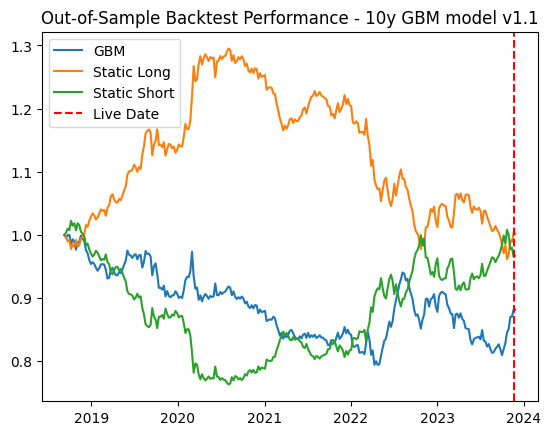

In [76]:
import matplotlib
import matplotlib.pyplot as plt
plt.plot(perf_data.index, perf_data['cumulative_ret'], label='GBM')
plt.plot(perf_data.index, perf_data['static_long_ret'], label='Static Long')
plt.plot(perf_data.index, perf_data['static_short_ret'], label='Static Short')
plt.title('Out-of-Sample Backtest Performance - 10y GBM model v1.1')
# Add a vertical line for the target date
Live_Date = backtest_results_10Y_UST_v1.index.max()
plt.axvline(x=pd.to_datetime(Live_Date), color='red', linestyle='--', label='Live Date')
# Label the line
#plt.text(pd.to_datetime(Live_Date),1.15,'Live Results Begin', color='red', verticalalignment='bottom', horizontalalignment='right')
plt.legend()

In [77]:
cum_ret_gbm = perf_data['cumulative_ret'][-1]
cum_ret_static_long = perf_data['static_long_ret'][-1]
cum_ret_static_short = perf_data['static_short_ret'][-1]

print(f'Out-of-Sample Cumulative Return of GBM: {cum_ret_gbm:.4f}')
print(f'Out-of-Sample Cumulative Return of Static Long: {cum_ret_static_long:.4f}')
print(f'Out-of-Sample Cumulative Return of Static Short: {cum_ret_static_short:.4f}')
import pandas as pd
import numpy as np


returns_df = perf_data.copy()

# Calculate drawdowns
returns_df['Peak'] = returns_df['cumulative_ret'].cummax()
returns_df['Drawdown'] = (returns_df['cumulative_ret'] / returns_df['Peak']) - 1

# # Find drawdowns
# drawdowns = returns_df[returns_df['Drawdown'] < 0]

# Calculate drawdown metrics
# Initialize lists to store drawdown metrics
drawdown_lengths = []
drawdown_depths = []
drawdown_dates = []

current_length = 0
current_depth = 0
current_start_date = None

for date, drawdown in zip(returns_df.index, returns_df['Drawdown']):
    if drawdown < 0:
        current_length += 1
        current_depth = min(current_depth, drawdown)
        if current_start_date is None:
            current_start_date = date
    else:
        if current_length > 0:
            drawdown_lengths.append(current_length)
            drawdown_depths.append(current_depth)
            drawdown_dates.append(current_start_date)
            current_length = 0
            current_depth = 0
            current_start_date = None
    

if current_length > 0:
    drawdown_lengths.append(current_length)
    drawdown_depths.append(current_depth)
    drawdown_dates.append(current_start_date)

# Calculate average length of drawdowns
average_drawdown_length = np.mean(drawdown_lengths)

# Identify the date, length, and depth of the longest drawdown
longest_drawdown_index = np.argmax(drawdown_lengths)
longest_drawdown_date = drawdown_dates[longest_drawdown_index]
longest_drawdown_length = drawdown_lengths[longest_drawdown_index]
longest_drawdown_depth = drawdown_depths[longest_drawdown_index]

print("Average Drawdown Length:", average_drawdown_length, "weeks")
print("Date of the Longest Drawdown:", longest_drawdown_date)
print("Length of the Longest Drawdown:", longest_drawdown_length, "weeks")
print(f"Depth of the Longest Drawdown: {longest_drawdown_depth:.4f}")

# Calculate Sortino ratio
risk_free_rate = 0.00  # replace with the actual risk-free rate
downside_returns = returns_df['trade ret'][returns_df['trade ret'] < 0]
downside_deviation = np.std(downside_returns)

sortino_ratio = (np.mean(returns_df['trade ret']) - risk_free_rate) / downside_deviation
print(f"Sortino Ratio: {sortino_ratio:.4f}")

# Calculate Sharpe ratio
sharpe_ratio = (np.mean(returns_df['trade ret']) - risk_free_rate) / np.std(returns_df['trade ret'])
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Calculate Information Ratio
benchmark_returns = returns_df['ret'] # static long
excess_returns = returns_df['trade ret'] - benchmark_returns
information_ratio = np.mean(excess_returns) / np.std(excess_returns)
print(f"Information Ratio: {information_ratio:.4f}")

Hit_rate = returns_df['trade ret'][returns_df['trade ret'] > 0].count() / returns_df['trade ret'].count()
print(f'Hit Rate: {Hit_rate:.4f}')

subset_df = returns_df[returns_df['Pos'] == -1 ]
subset_df["short_cum_ret"] = (subset_df['trade ret'] +1).cumprod()
cum_ret_shorts = subset_df['short_cum_ret'][-1]
print(f'Cumulative Return of Shorts: {cum_ret_shorts:.4f}')
subset_df2 = returns_df[(returns_df['Pos'] == -1) & (returns_df['trade ret'] > 0)]
short_Hit_rate = subset_df2['Pos'].count() / returns_df['Pos'][returns_df['Pos'] == -1].count()
print(f'Hit Rate of Shorts: {short_Hit_rate:.4f}')


subset_df = returns_df[(returns_df['Pos'] == 1) ]
subset_df["long_cum_ret"] = (subset_df['trade ret'] +1).cumprod()
cum_ret_longs = subset_df['long_cum_ret'][-1]
print(f'Cumulative Return of Longs: {cum_ret_longs:.4f}')
subset_df2 = returns_df[(returns_df['Pos'] == 1) & (returns_df['trade ret'] > 0)]
long_Hit_rate = subset_df2['Pos'].count() / returns_df['Pos'][returns_df['Pos'] == 1].count()
print(f'Hit Rate of Longs: {long_Hit_rate:.4f}')


Out-of-Sample Cumulative Return of GBM: 0.8817
Out-of-Sample Cumulative Return of Static Long: 1.0019
Out-of-Sample Cumulative Return of Static Short: 0.9670
Average Drawdown Length: 135.5 weeks
Date of the Longest Drawdown: 2018-10-07 00:00:00
Length of the Longest Drawdown: 269 weeks
Depth of the Longest Drawdown: -0.2059
Sortino Ratio: -0.0556
Sharpe Ratio: -0.0376
Information Ratio: -0.0396
Hit Rate: 0.5092
Cumulative Return of Shorts: 0.9332
Hit Rate of Shorts: 0.4928
Cumulative Return of Longs: 0.9448
Hit Rate of Longs: 0.5147


C:\Users\dstoc\AppData\Local\Temp\ipykernel_22388\3466426242.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["short_cum_ret"] = (subset_df['trade ret'] +1).cumprod()
C:\Users\dstoc\AppData\Local\Temp\ipykernel_22388\3466426242.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["long_cum_ret"] = (subset_df['trade ret'] +1).cumprod()
